### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 9
### Due: Saturday, Apr 16th at 11.59pm CDT
---

The first two homework problems this week are very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?


5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

### Part 1

Equation to algebraically describe the output of the network:

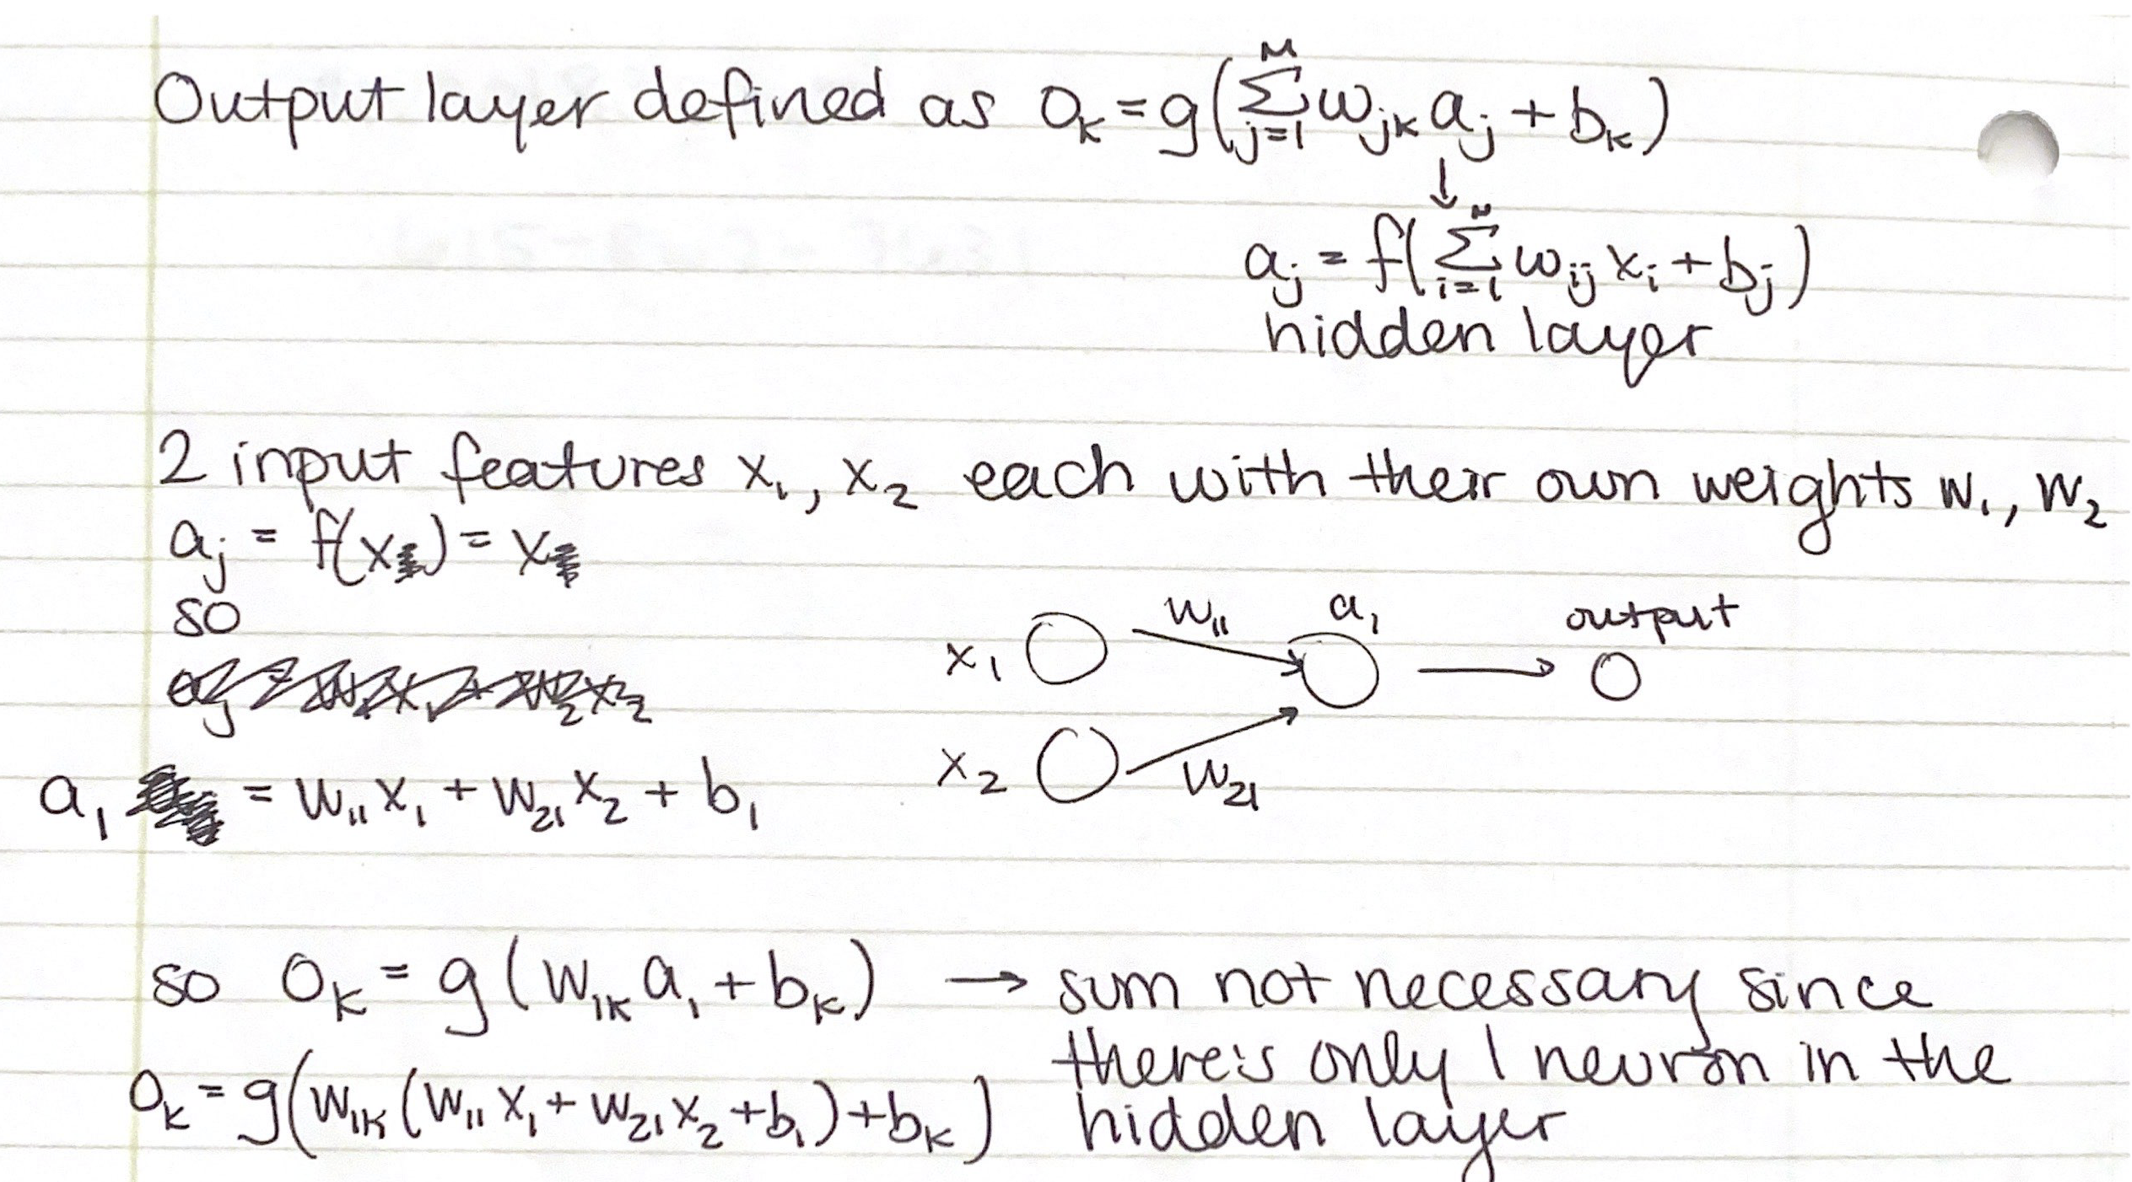

Since the equation for the output is strictly linear in terms of the input data $x_1$ and $x_2$, my guess is that the model probably won't learn any nonlinearities. After running the network multiple times and also changing the values for ratio of training to test data, noise, and batch size, the model did not learn any nonlinearities as expected.

### Part 2

Some runs with 2 neurons in hidden layer and ReLU activation:

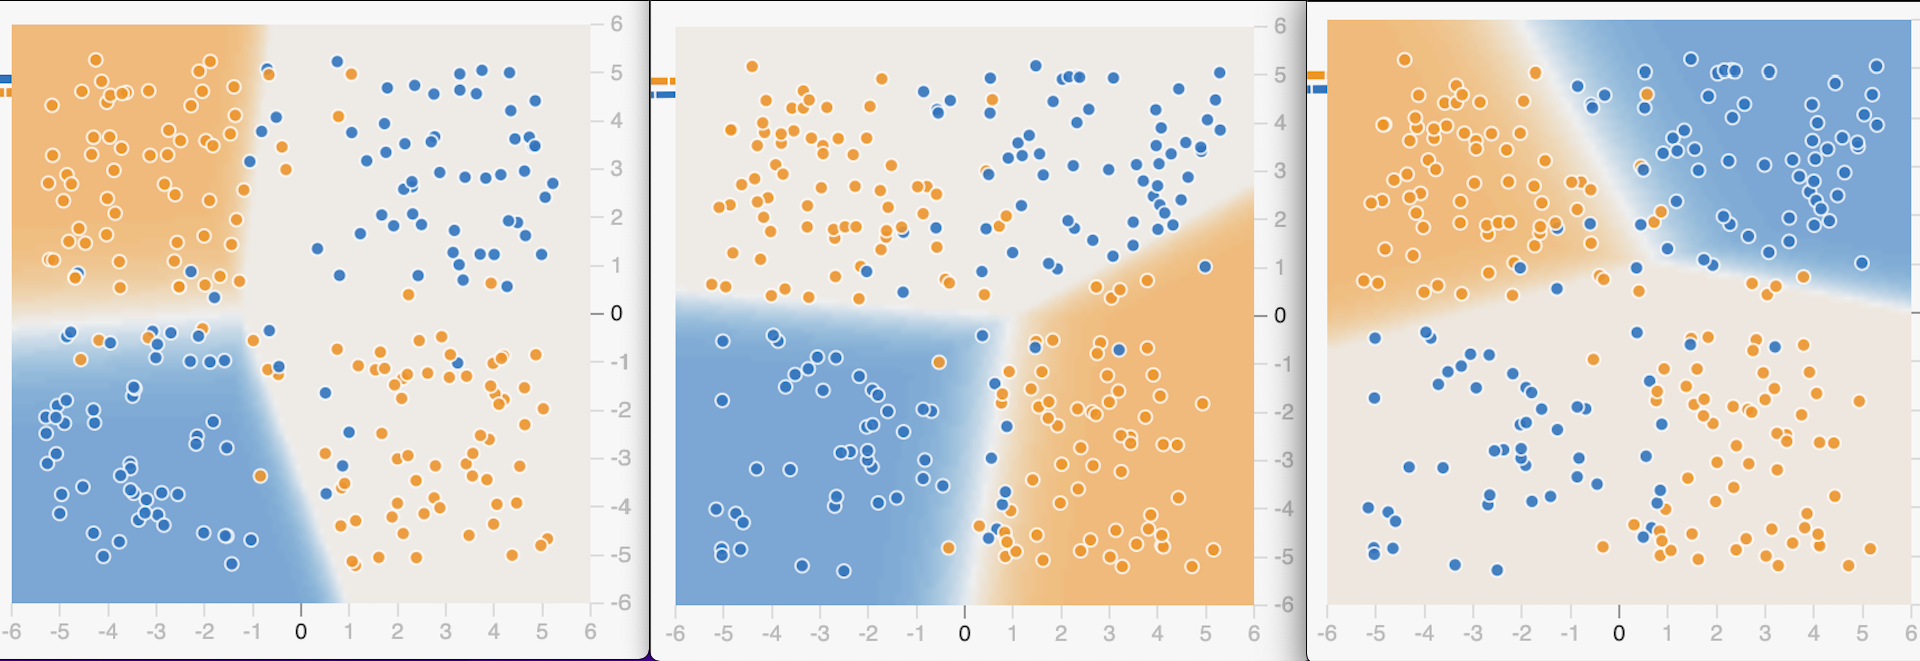

The model does learn nonlinearities now, but it's still struggling to model the data effectively.

### Part 3

In some runs, the data is modeled pretty effectively, or at least much better compared to part 2:

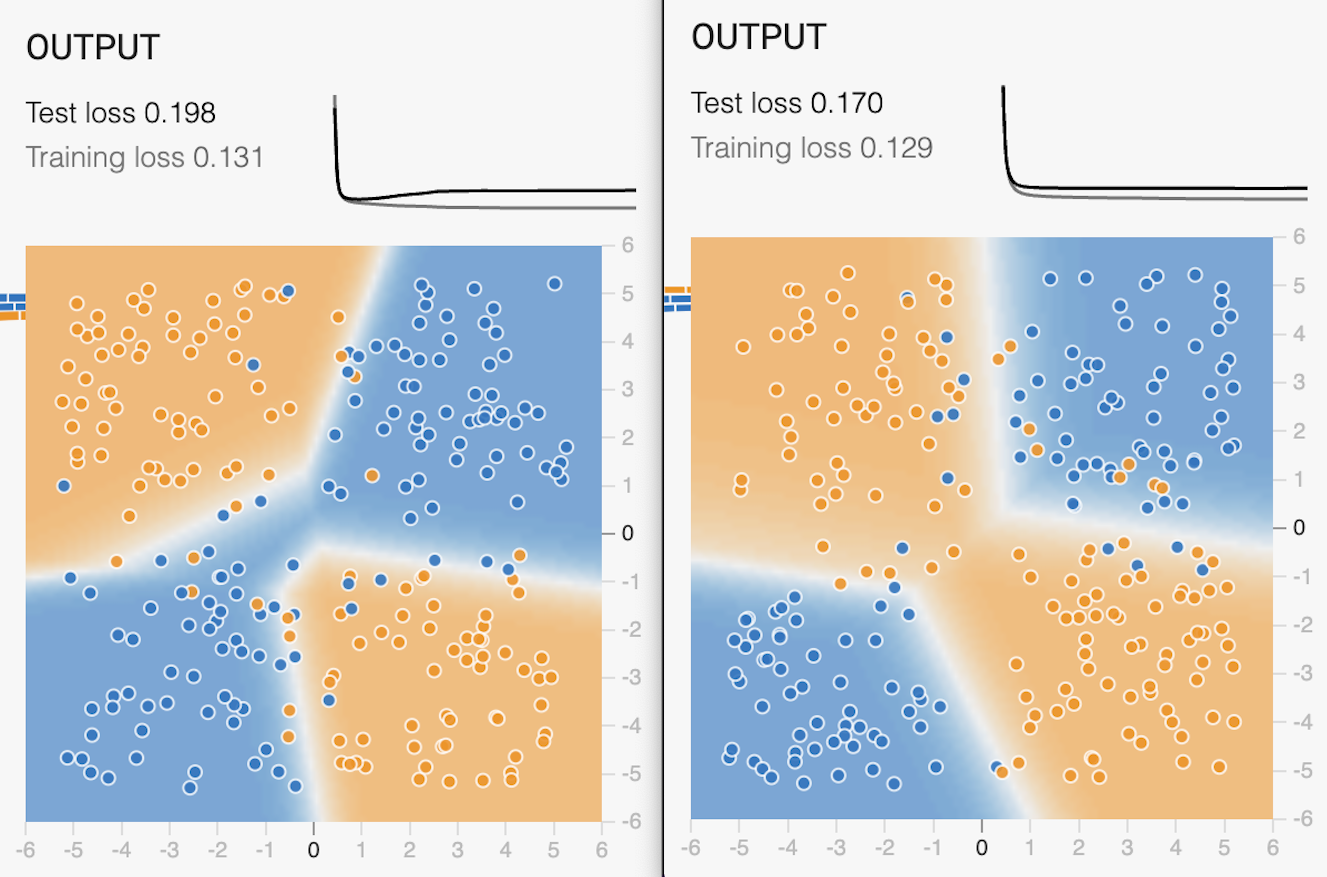

However, the model quality varies from run to run in that sometimes the data is modeled as shown above, and at other times the data is modeled as it was with 2 neurons (the images below show a 3 neuron model to compare with part 2):

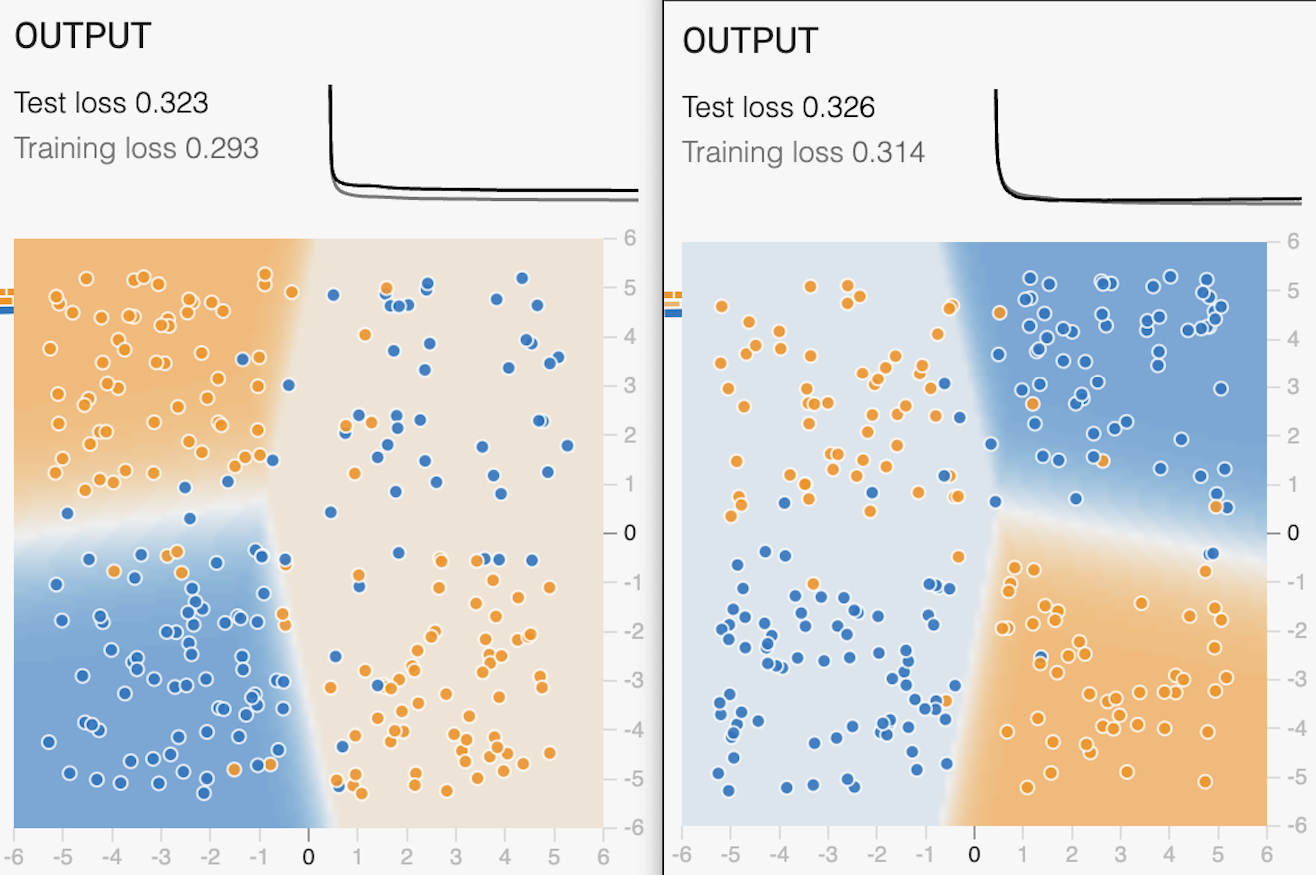

### Part 4

Incidentally, one of the screenshots from part 3 shows a test loss of 0.170, using 1 hidden layer and 3 neurons. Not including that network setup, you can also obtain a test loss of 0.177 or lower using 1 hidden layer and 4 neurons:

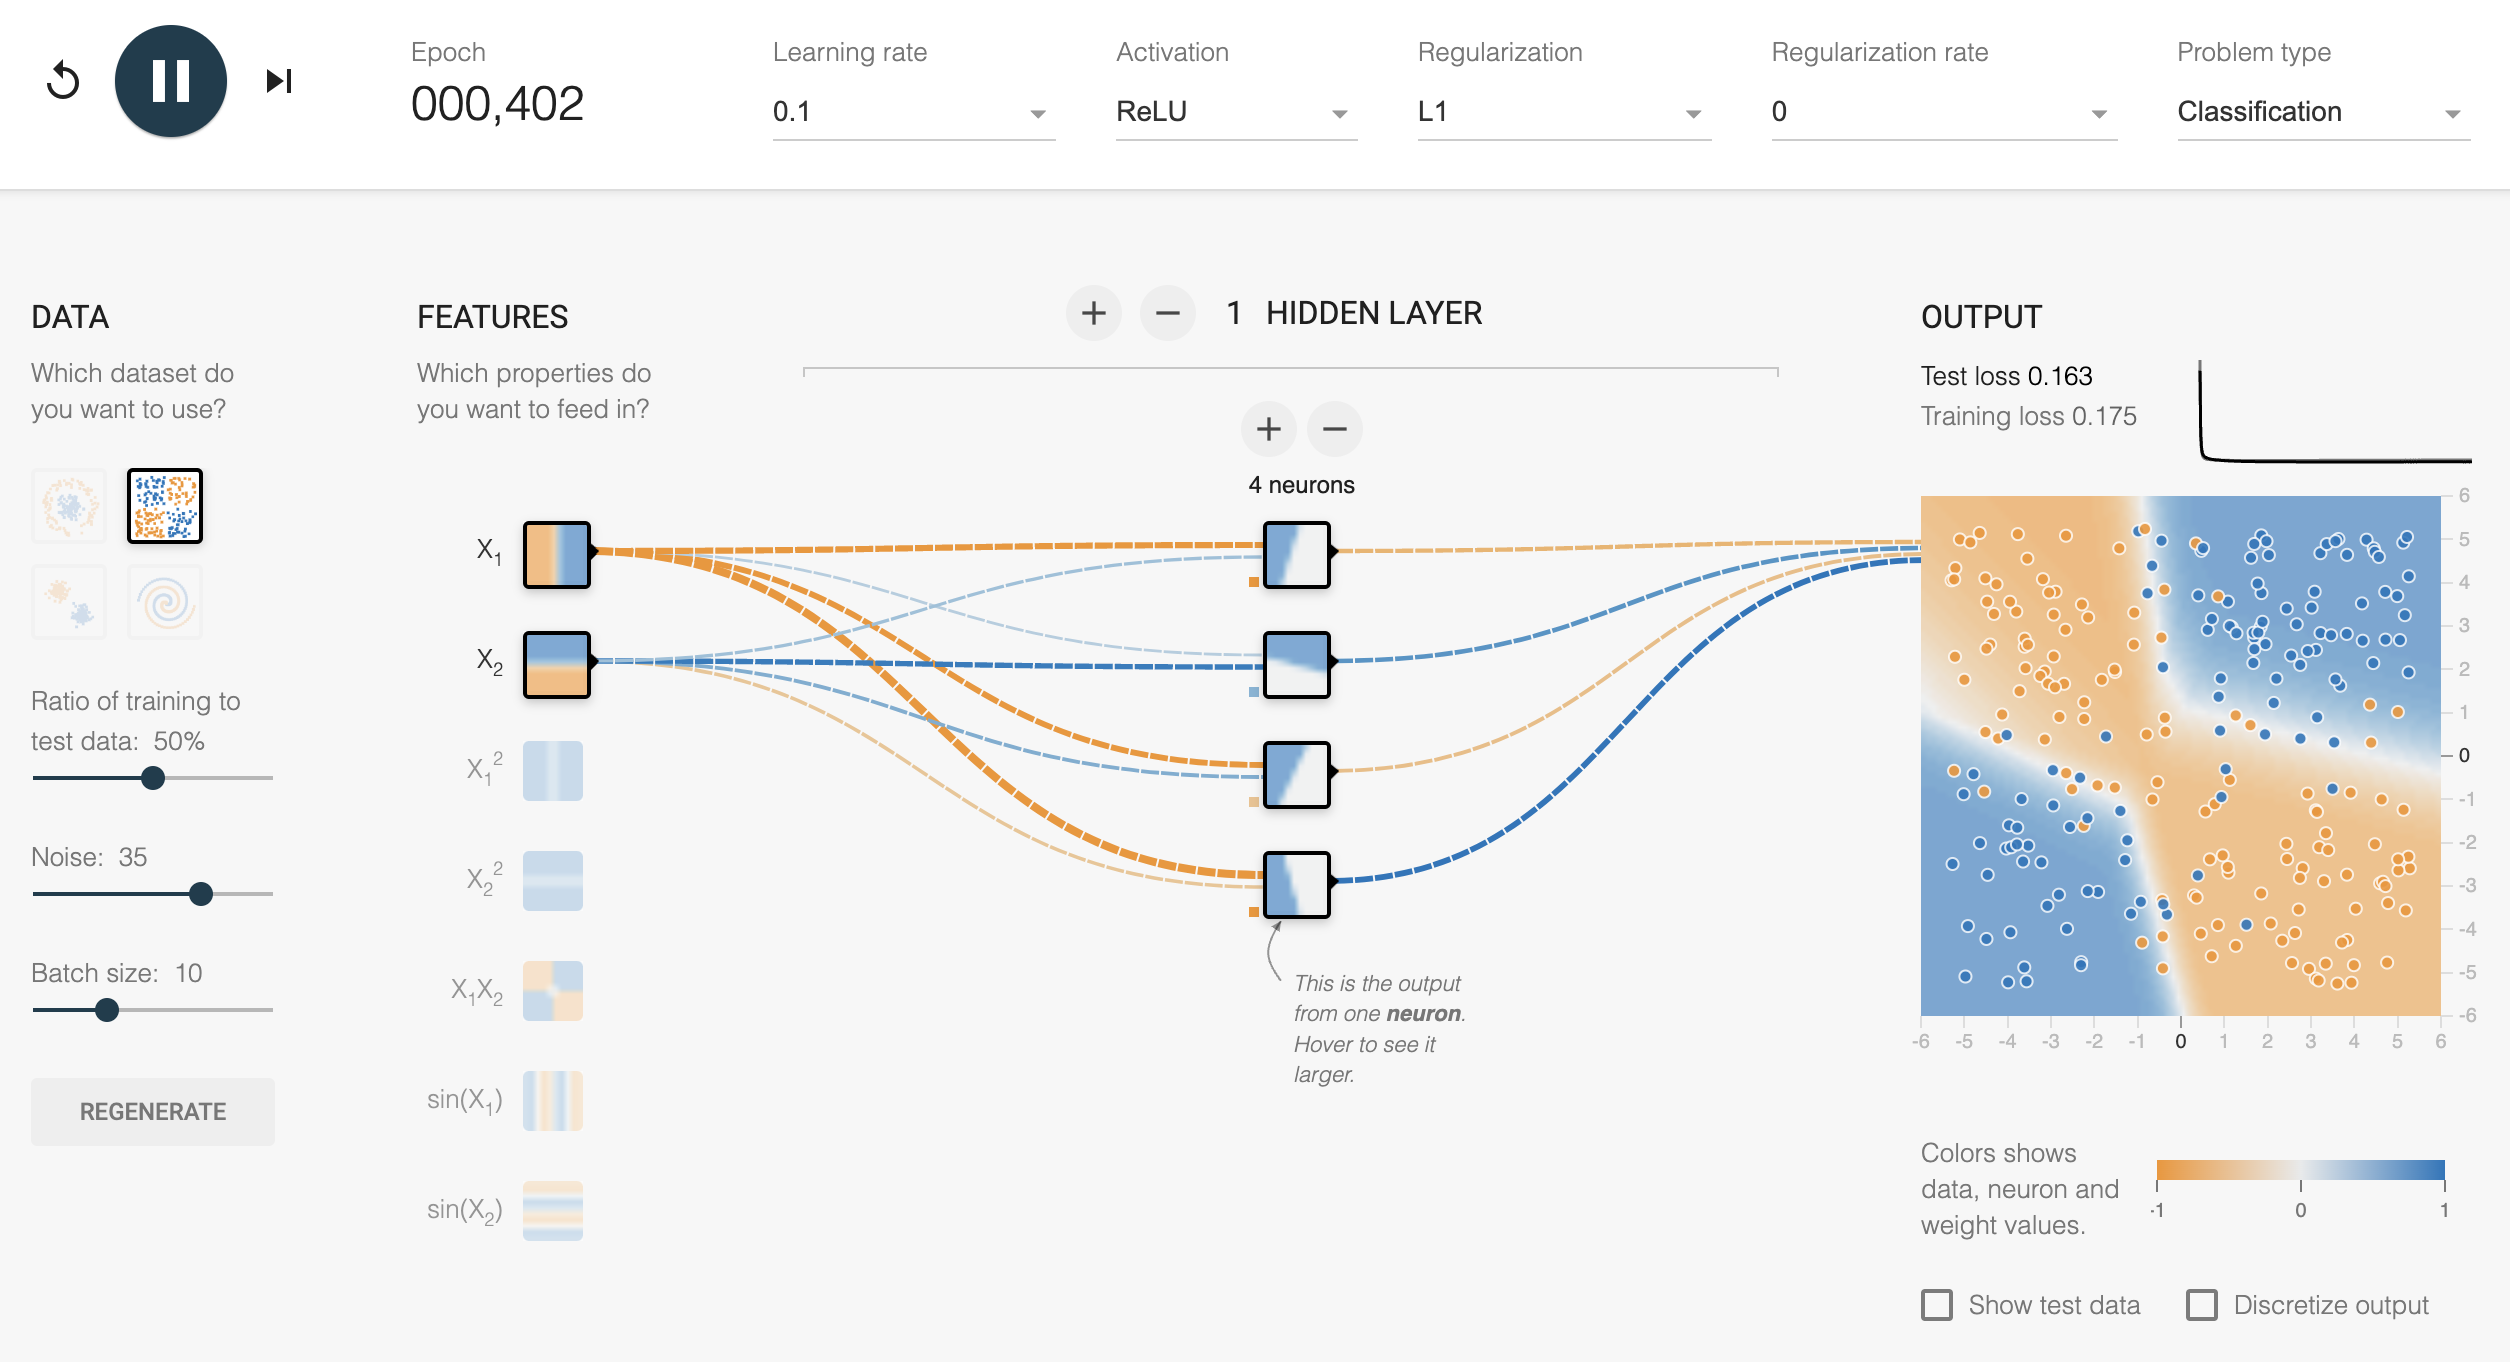

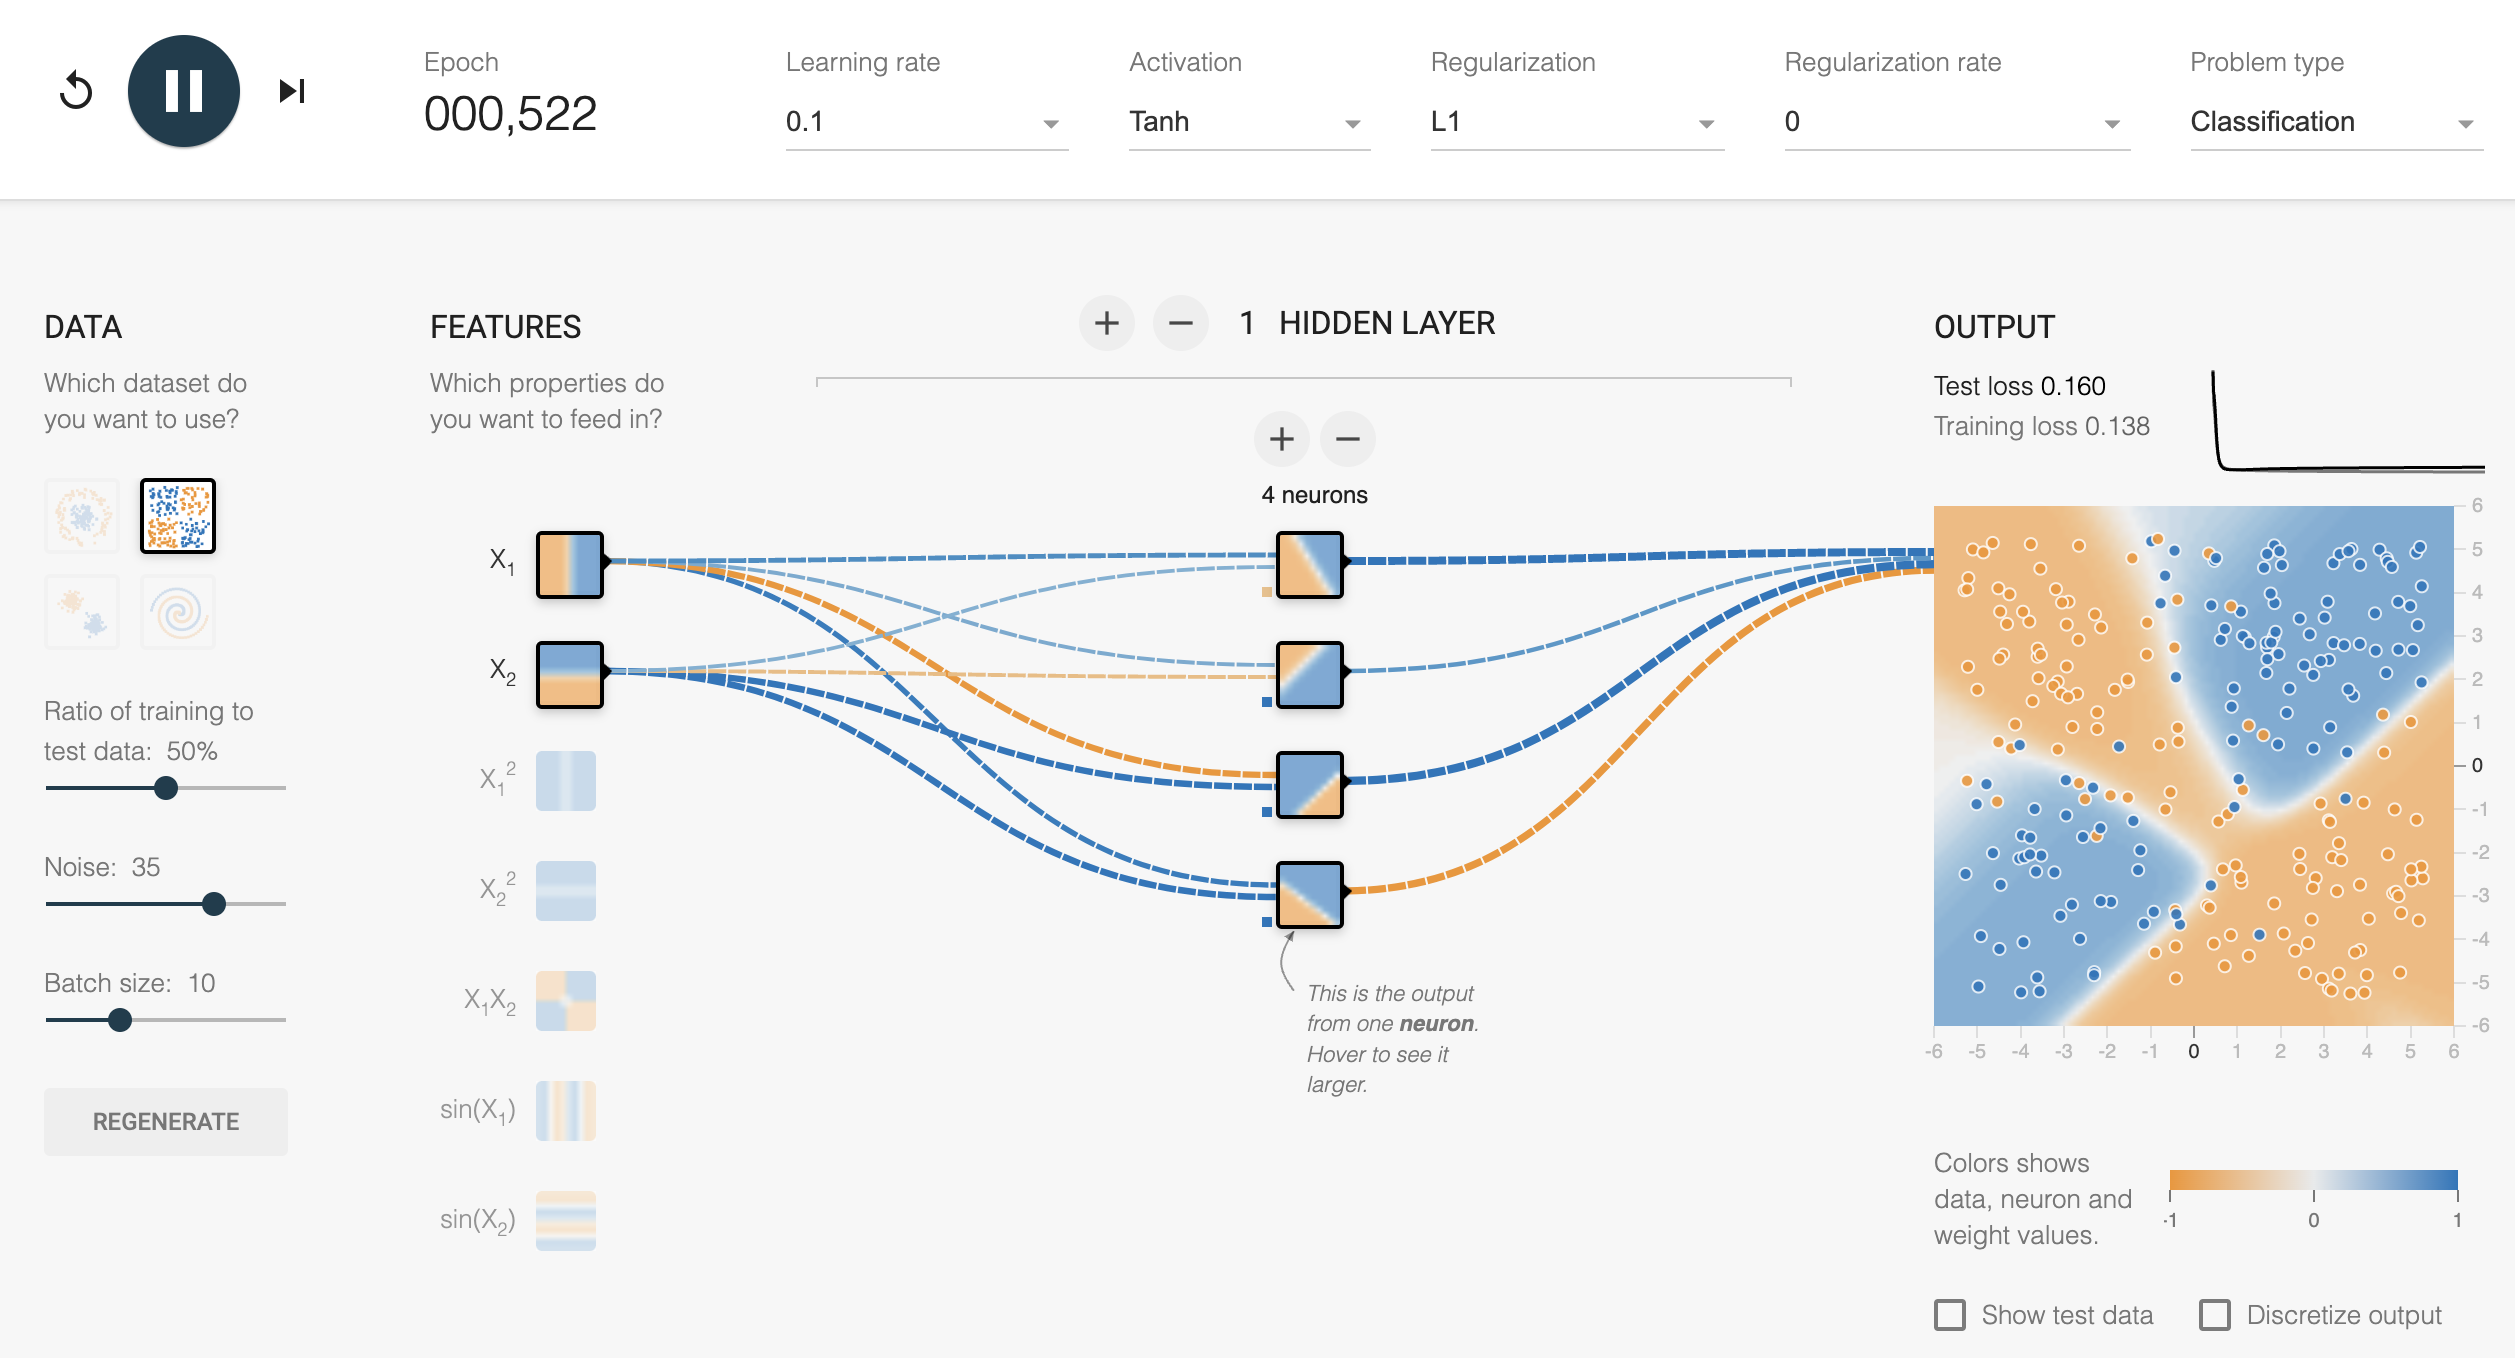

### Part 5

Increasing the model size does not necessarily improve the fit -- the test loss value seems to be about the same as in parts 3 and 4. However, it does seem to converge more quickly, especially when using a tanh activation function rather than ReLU. It also looks to be converging to a good model more often; for example, it converged more consistently using the 3-3-2 setup than in the case with 1 hidden layer and 3 neurons.

## Problem 2


[This](https://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.1&regularizationRate=0.01&noise=50&networkShape=3,2&seed=0.65406&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) data set is a noisy spiral. Obviously, a linear model will fail here, but even manually defined feature combinations may be hard to construct.

1. Train the best model you can, using just X1 and X2. Add or remove layers and neurons as you see fit, change learning settings like learning rate, regularization rate, and batch size. What is the best test loss you can get? How smooth is the model output surface?


2. Even with Neural Nets, some amount of feature engineering is often needed to achieve best performance. Try adding in additional cross product features or other transformations like sin(X1) and sin(X2). Do you get a better model? Is the model output surface any smoother?

### Part 1

The best model using just X1 and X2:

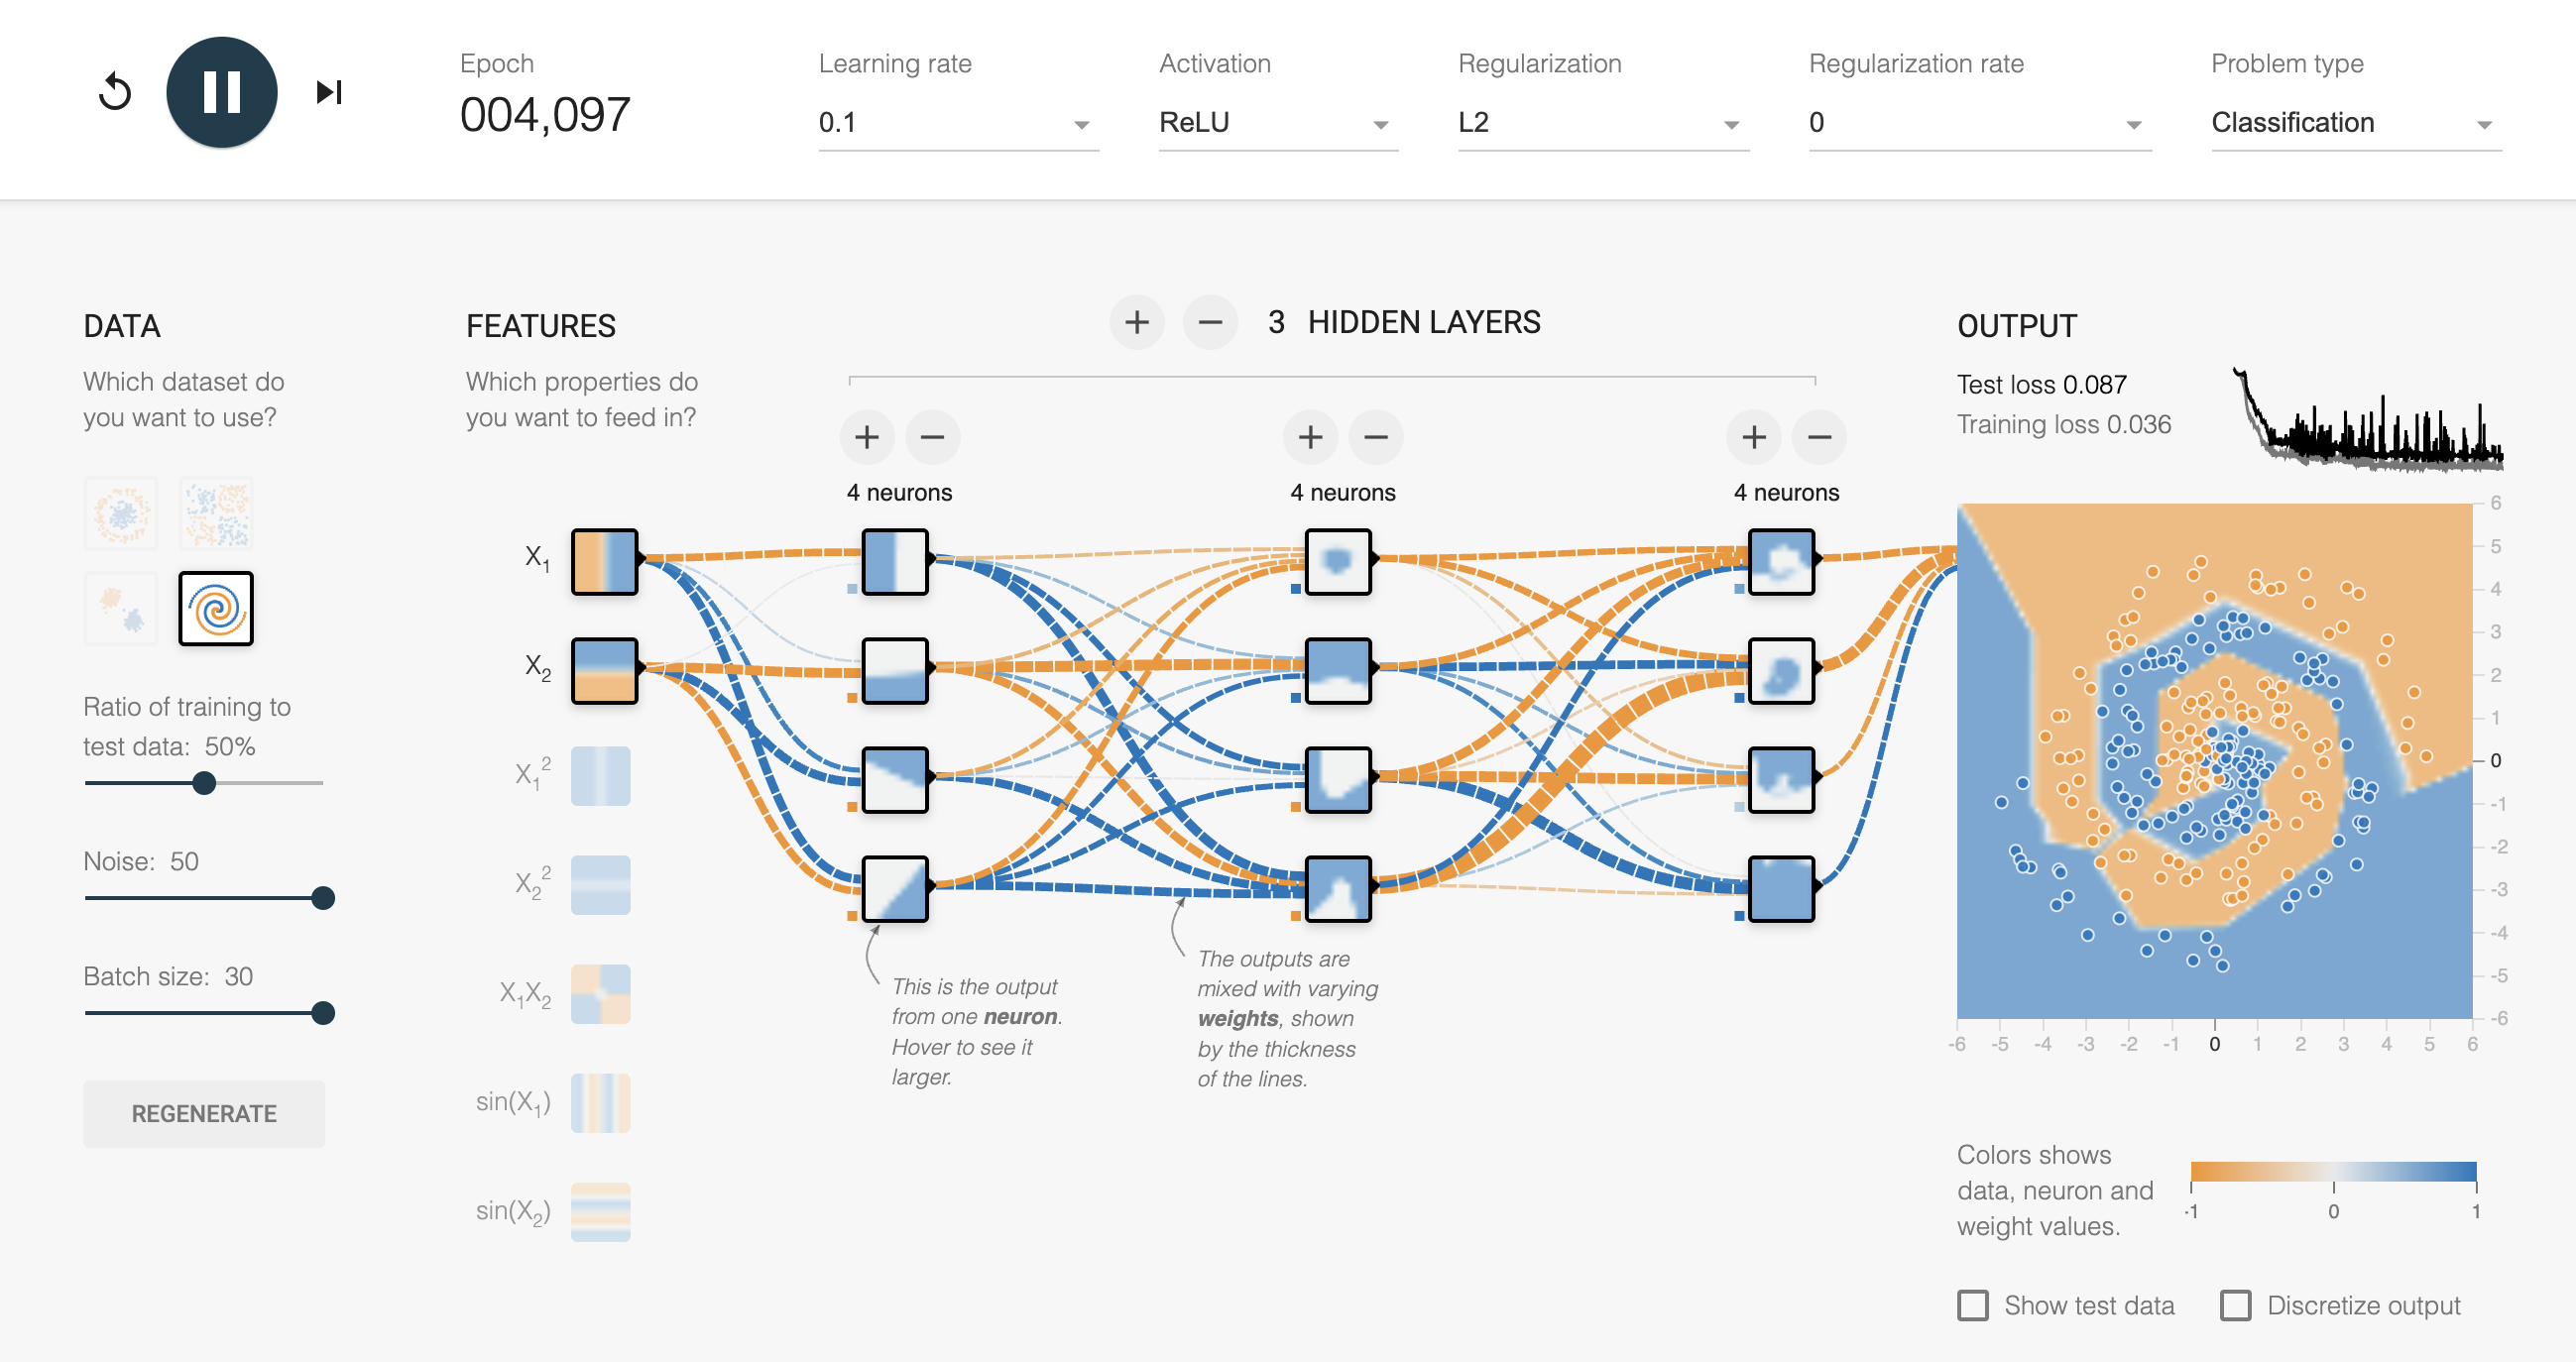

with a test loss of 0.087. The model output surface is not very smooth at all in that the two classes are separated by many connected line segments as opposed to smooth curves.

### Part 2

The best model I was able to get when adding in additional features:

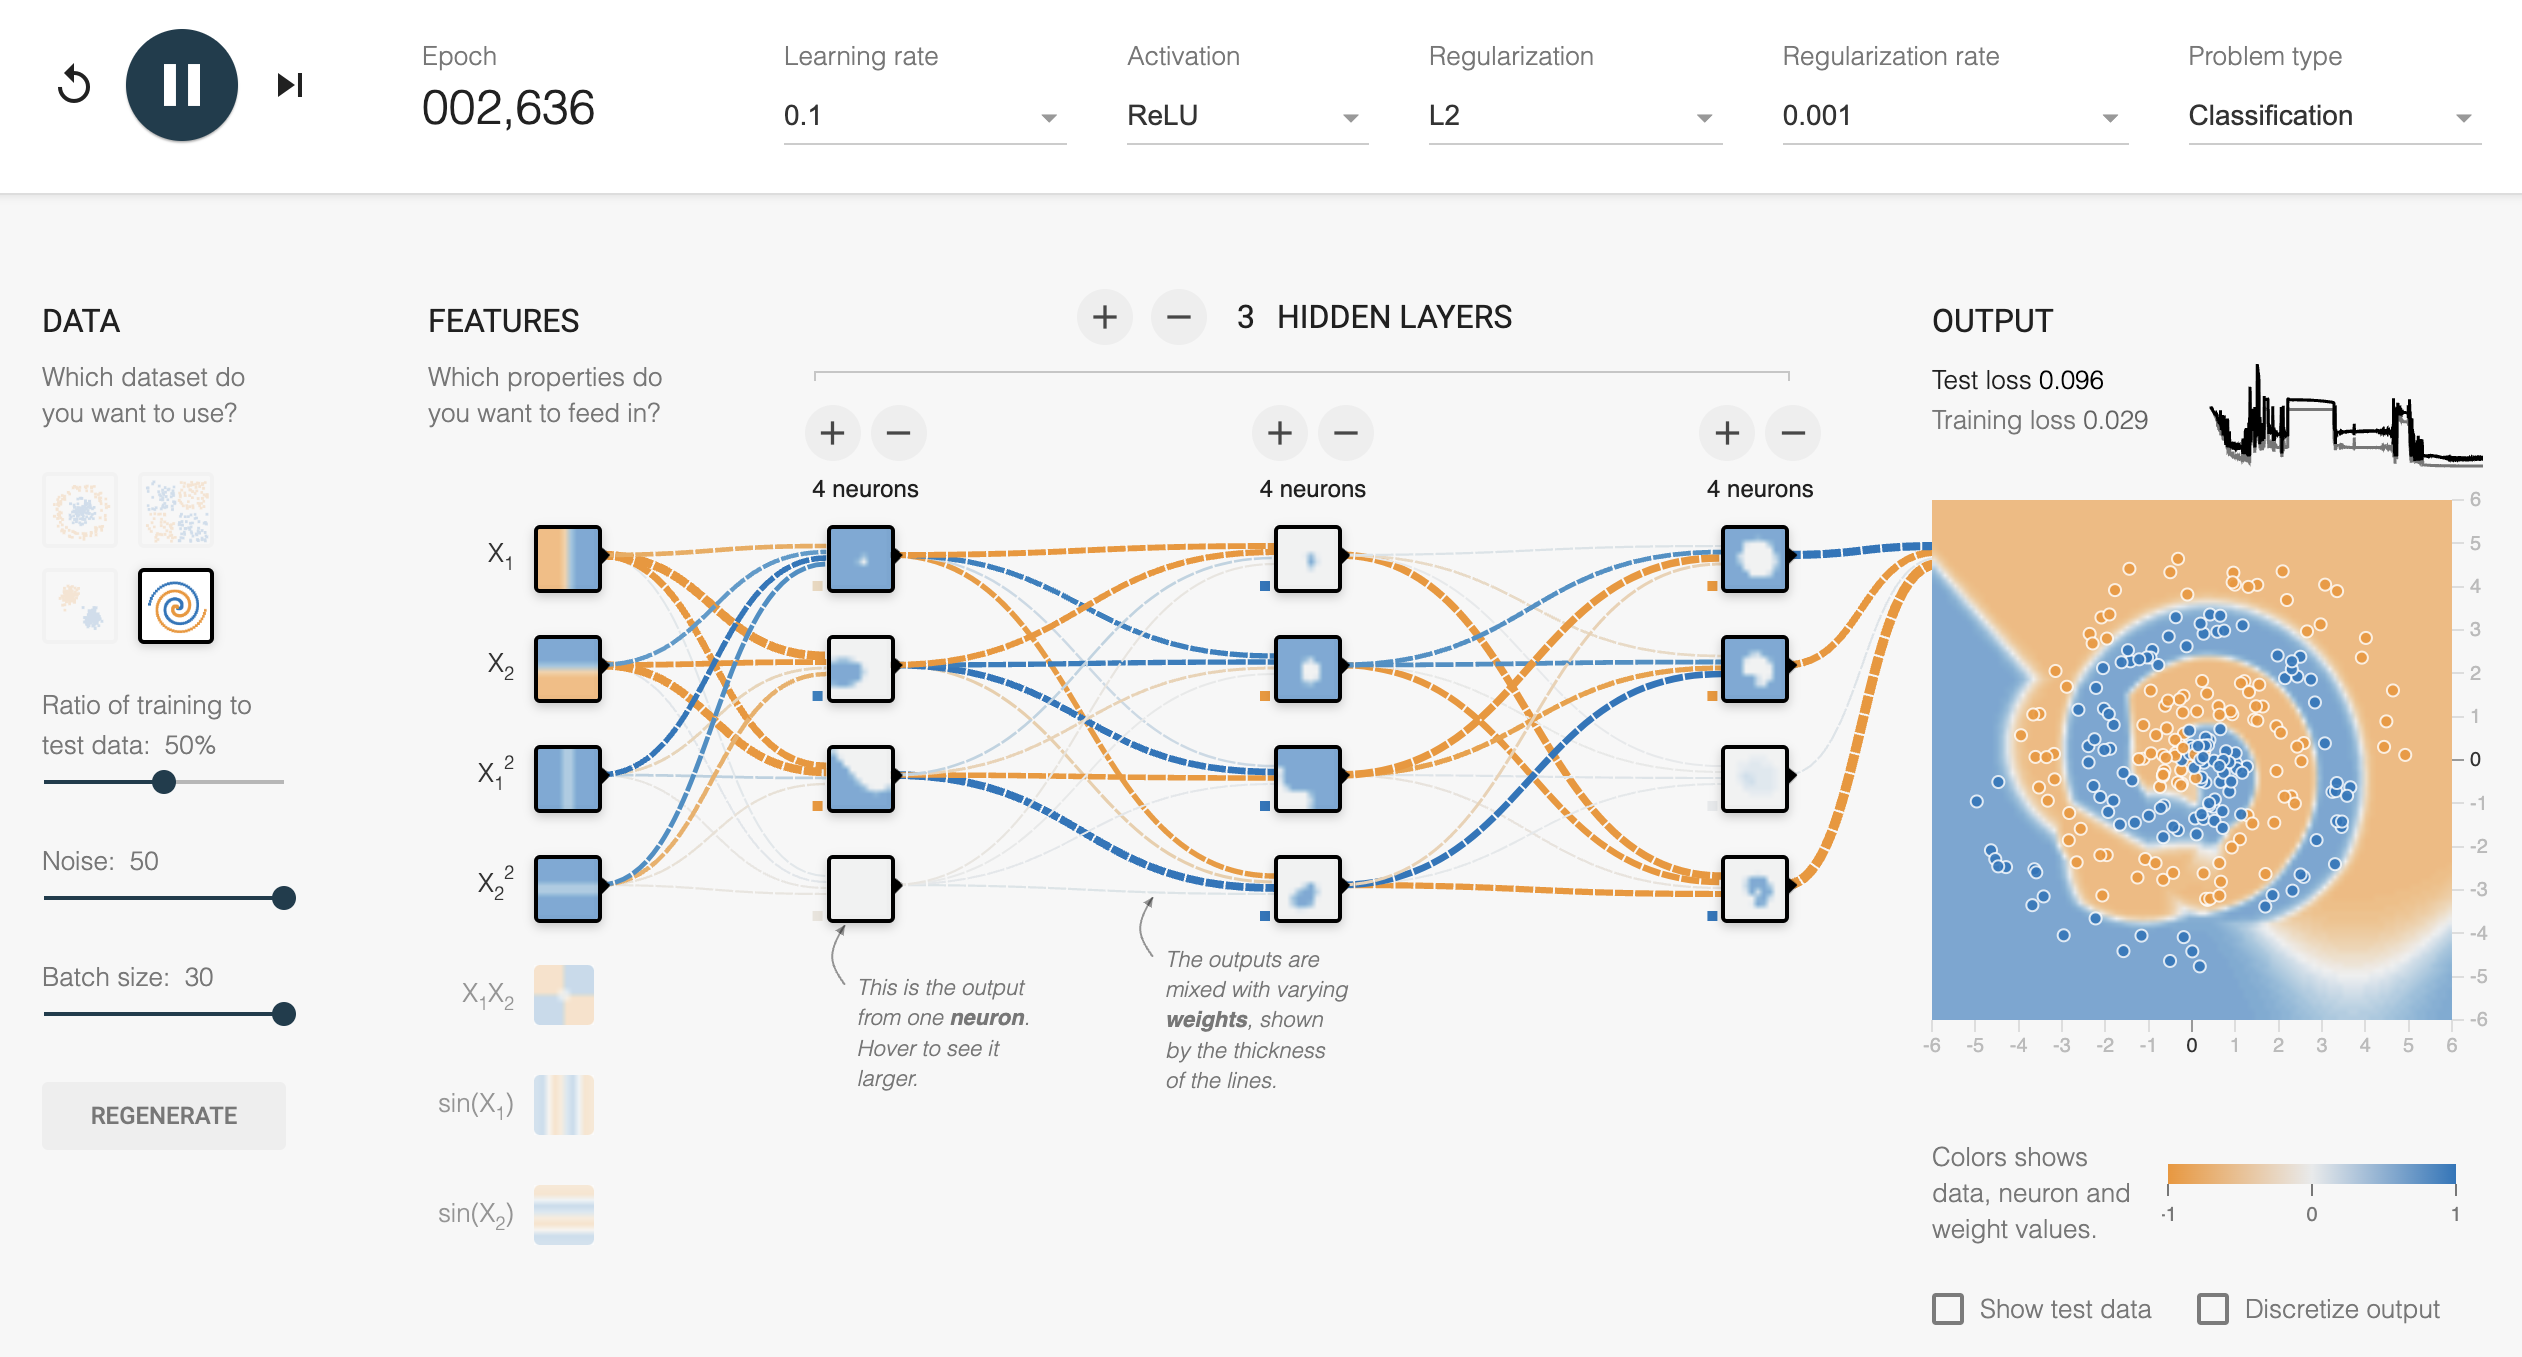

Looking at the test loss, this model is somewhat similar to the best model I found using just X1 and X2, so it's not necessarily better, but the model output surface is definitely a lot smoother in this case.

## Problem 3

The first few steps of this problem are the same as last week's homework.


1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other $10$th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

### Part 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [5]:
#reading in data
data = np.load('/Users/petrop3/Repos/astr_8070_s22/coursework/homeworks/hw_data/hw8_data_1.npy')
dataslice = data[::10] #every other 10th row

In [7]:
#creating color arrays
ug = dataslice['u']-dataslice['g']
gr = dataslice['g']-dataslice['r']
ri = dataslice['r']-dataslice['i']
iz = dataslice['i']-dataslice['z']

#arrays for redshift and spectral class
z = dataslice['redshift']
zerr = dataslice['redshift_err']
specClass = dataslice['specClass']

### Part 2

/var/folders/tq/_zbt6tvn54j23tbg267ynw3c0000gr/T/ipykernel_96895/410923440.py:17: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar0 = fig.colorbar(im0, ticks=[0, 1])


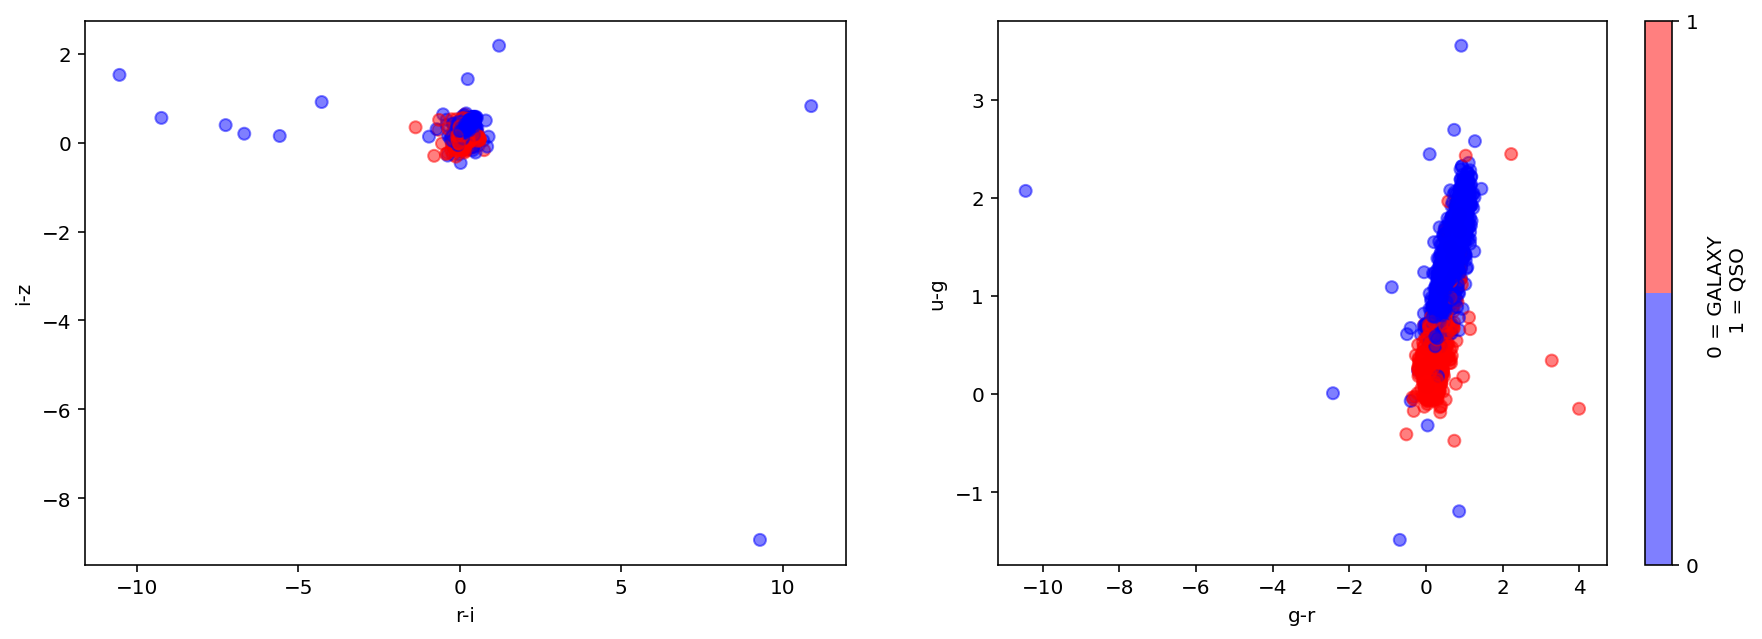

In [17]:
#Color coding by galaxy/quasar
labels = np.full(len(specClass), 0)
id1, id2 = np.where(specClass=='QSO')[0], np.where(specClass=='GALAXY')[0]
labels[id1] = 1
labels[id2] = 0

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

im0 = ax[0].scatter(iz, ri, c=labels, cmap=plt.cm.get_cmap('bwr', 2), alpha=0.5)
ax[0].set_ylabel('i-z')
ax[0].set_xlabel('r-i')
cbar0 = fig.colorbar(im0, ticks=[0, 1])
cbar0.set_label('0 = GALAXY \n 1 = QSO', rotation=90) 

im1 = ax[1].scatter(gr, ug, c=labels, cmap=plt.cm.get_cmap('bwr', 2), alpha=0.5)
ax[1].set_ylabel('u-g')
ax[1].set_xlabel('g-r')

plt.show()

### Part 3

In [22]:
#Stacking colors into data matrix
X = np.column_stack((ri, iz))

#Target label array already created in previous part, just defining as y to make things easier
y = labels

In [23]:
from sklearn.model_selection import train_test_split

#Train-test split, taking 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Part 4

In [24]:
from sklearn import preprocessing

In [25]:
#Scaling training and testing data
Xtrain_scaled = preprocessing.scale(X_train)
Xtest_scaled = preprocessing.scale(X_test)

### Part 5

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve

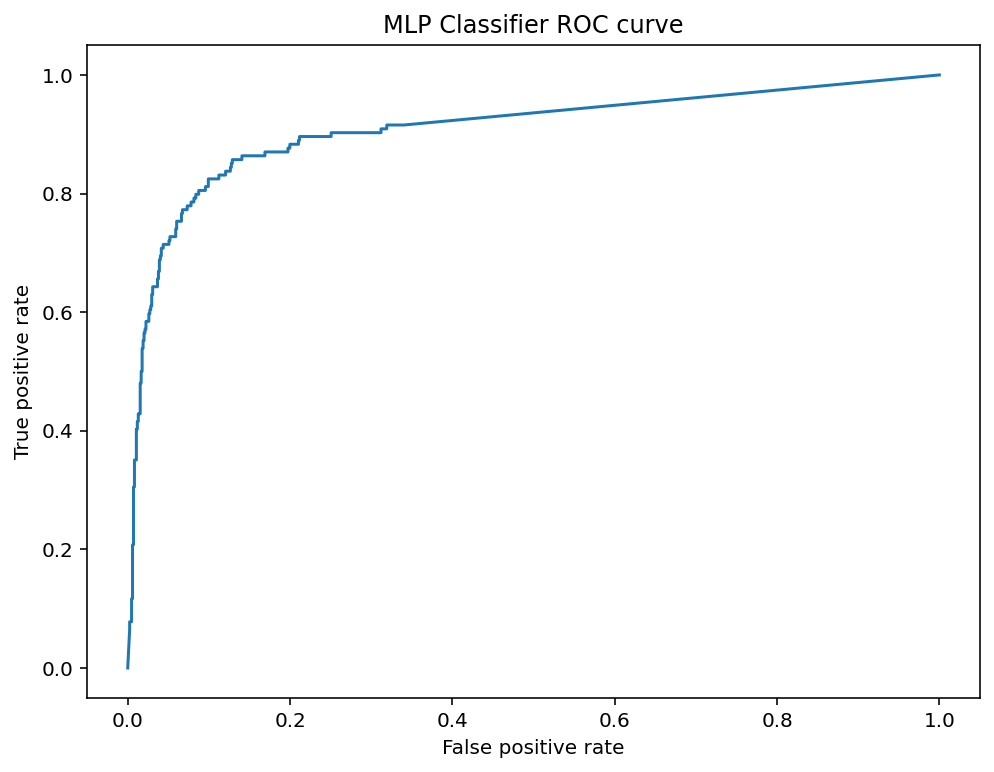

In [32]:
#Training MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(5,2), activation='relu', max_iter=1000, random_state=42)
clf.fit(Xtrain_scaled, y_train)

#Getting ROC curve
y_prob = clf.predict_proba(Xtest_scaled)
fpr, tpr, thresh = roc_curve(y_test, y_prob[:,1])

#Plotting ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('MLP Classifier ROC curve')
plt.show()

### Part 6

In [34]:
from sklearn.model_selection import GridSearchCV

In [36]:
#Hyperparameters for network
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}

#Optimizing
grid = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1) #using all available cores
grid.fit(Xtrain_scaled, y_train)
print('Best params:', grid.best_params_)
print('Best score:', grid.best_score_)

Best params: {'activation': 'tanh', 'hidden_layer_sizes': (5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'adam'}
Best score: 0.9355


### Part 7

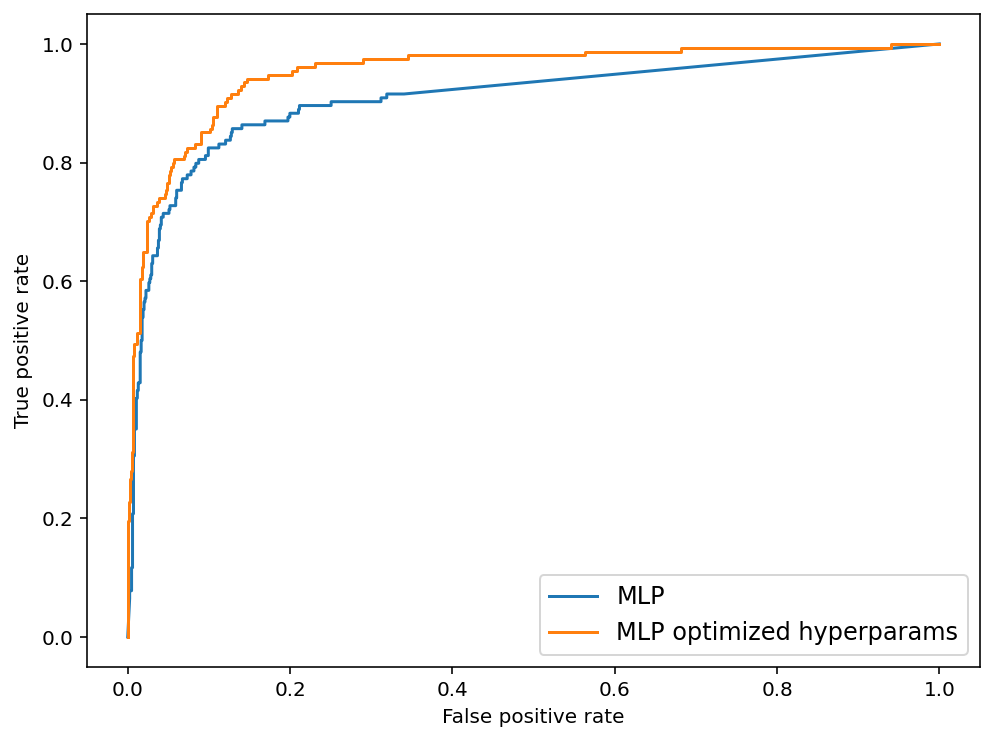

/Users/petrop3/anaconda3/envs/astr8070/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/petrop3/anaconda3/envs/astr8070/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/petrop3/anaconda3/envs/astr8070/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: Converg

In [39]:
#Training MLP classifier now with best hyperparams
clf_best = MLPClassifier(hidden_layer_sizes=(5,5), activation='tanh', max_iter=1000, random_state=42, solver='adam')
clf_best.fit(Xtrain_scaled, y_train)
y_prob_best = clf_best.predict_proba(Xtest_scaled)
fpr_best, tpr_best, thresh_best = roc_curve(y_test, y_prob_best[:,1])

#Plotting ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='MLP')
plt.plot(fpr_best, tpr_best, label='MLP optimized hyperparams')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right', fontsize='large')
plt.show()